En esta práctica vamos a generar una secuencia de valores pesos de diferentes hombres.

Tienes que, usando las librerías vistas en este tema y google collab, mostrar:

* Media, mediana y rangos.
* Desviación estándar muestral.
* Dibujar distribución de datos e histograma.
* Buscar outliers (con los dos métodos) y observaciones influyentes (si las hay).
* Dibujar un boxplot.
* Estandarizar los datos de las tres formas que se han visto.

A continuación tenéis el código con el que debéis comenzar vuestra práctica.



In [ ]:
import numpy as np
import pandas as pd

# Generación de datos
# ==============================================================================
mu, sigma = 75, 15 # media y desviación típica de la población
# Generamos una muestra de tamaño 500
np.random.seed(1)
datos = np.random.normal(mu, sigma, 500)
# Cambiamos los valores de dos datos para convertirlos en outliers
datos[50]=100
datos[75]=1
datos[150]=250
datos[300]=-10
datos

array([ 99.36518045,  65.8236538 ,  67.07742372,  58.90547067,
        87.98111444,  40.47691955, 101.17217646,  63.58189649,
        79.78558644,  71.25944437,  96.93161906,  44.09788936,
        70.16374194,  69.23918468,  92.00654164,  58.50163099,
        72.41357689,  61.83212373,  75.6332062 ,  83.74222821,
        58.49071234,  92.17085565,  88.52386081,  82.53741508,
        88.51283924,  64.74408211,  73.15664662,  60.96345849,
        70.98167881,  82.955332  ,  64.62508872,  69.0486971 ,
        64.6924095 ,  62.32191538,  64.93130804,  74.81003102,
        58.24034477,  78.51623547,  99.89703266,  86.13066241,
        72.12246671,  61.68556554,  63.79262559, 100.38681902,
        75.76211632,  65.4450653 ,  77.86373227, 106.50382705,
        76.80238429,  84.25804665, 100.        ,  69.7162523 ,
        57.86222703,  69.75985916,  71.8665865 ,  83.79934787,
        87.58475121,  88.96653122,  79.28380988,  88.27711746,
        63.68403089,  93.79302233,  82.69394731,  70.52

**Ejercicio 1: Media, mediana y rangos.**

Para sacar la media, la mediana y los rangos usaremos la librería de numpy con las siguientes funciones:
* **mean()**
* **median()**
* **max() y min() para hacer el rango**

In [ ]:
# Realizamos la media
mean = np.mean(datos)
mean

75.88254434431963

La media muestral resultante es de 75.88 kg. Bastante similar a la que pusimos an el momento de generar los datos.

In [ ]:
# Realizamos la mediana
median = np.median(datos)
median

75.58180382827763

La mediana sale similar a la media muestral, con un 75.58 kg.

In [ ]:
# Realizamos el rango
maximo = np.max(datos)
print("El máximo es:", maximo)
minimo = np.min(datos)
print("El mínimo es:", minimo)
rango = maximo - minimo
print("El rango es de", rango)

El máximo es: 250.0
El mínimo es: -10.0
El rango es de 260.0


El rango sale 260 kg ya que el mínimo es un outlier de -10 kg.

**Ejercicio 2: Desviación estándar muestral**

Para sacar la desviación estándar muestral usaremos la función ``np.std()`` de numpy.

In [ ]:
# Realizamos la desviación estándar muestral
desviacion = np.std(datos)
desviacion

17.428000115668254

Obtenemos un valor apróximado de 17.43. Difiere de la desviación igual a 15 del inicio, esto puede deberse a los outliers que pusimos después de generar los datos.

**Ejercicio 3: Dibujar distribución de datos e histograma.**

Para dibujar una distribución de datos usaremos los DataFrames de pandas y con la función ``describe()``.

In [ ]:
# Dibujando distribución de datos
data = pd.DataFrame(datos, columns=["Pesos"])
data.describe()

,Pesos
count,500.000000
mean,75.882544
std,17.445454
min,-10.000000
25%,65.722082
50%,75.581804
75%,86.162040
max,250.000000


Para dibujar el histograma usaremos la librería de ``matplotlib``.

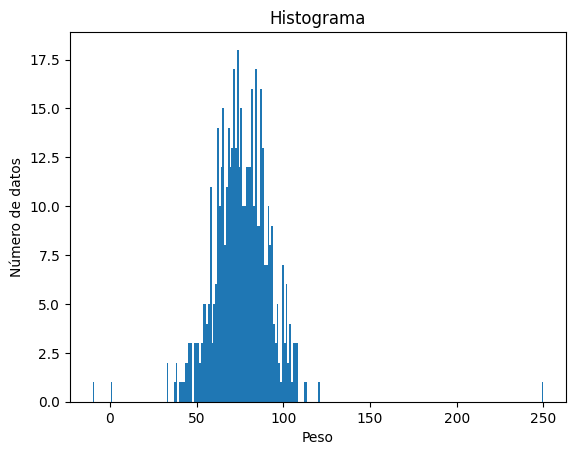

In [ ]:
# Dibujando el histograma
import matplotlib.pyplot as plt
plt.hist(datos, 250)
plt.ylabel('Número de datos')
plt.xlabel('Peso')
plt.title('Histograma')
plt.show()

Podemos observar que la mayoría de los datos están apróximadamente cerca de los 75 kg.

**Ejercicio 4: Outliers y observaciones influyentes**

Para sacar los outliers se puede hacer de dos formas posibles:
* **Asumiendo Distribución Normal**
* **Método del Rango Intercuartílico**

### Caso 1: Asumiendo Distribución Normal

En este caso suponemos que la variable sigue una distribución normal. Para construir las bandas se puede hacer de dos formas:
* Con el criterio de probabilidad global
* Con el criterio de Chauvenet

In [ ]:
# MÉTODO DE CHAUVENET
import scipy.stats as st

"""
# El criterio de la probabilidad global es aquel
# en donde alfa tiene un porcentaje ya indicado.

p_g = 0.95
alfa_g = (1 - p_g)/2 # Probabilidad global
alfa = 1 - (1 - alfa_g)**(1/len(datos)) # Probabilidad
"""

alfa = 1/(2*len(datos))
Z_alfa = st.norm.ppf(1-alfa/2)

alfa = round(alfa, 5)
Z_alfa = round(Z_alfa, 5)
print(f" Alfa = {alfa}")
print(f" CUANTIL Z_(1-alfa/2) = {Z_alfa}")

lower_bound = np.mean(datos) - Z_alfa * np.std(datos)
upper_bound = np.mean(datos) + Z_alfa * np.std(datos)
print(f" Banda = [{lower_bound}, {upper_bound}]")

# Imprimimos los outliers
for i in range(len(datos)):
    if datos[i] < lower_bound  or datos[i] > upper_bound:
        print(f"datos[{i}]={datos[i]} es outlier")

 Alfa = 0.001
 CUANTIL Z_(1-alfa/2) = 3.29053
 Banda = [18.53518712370977, 133.2299015649295]
datos[75]=1.0 es outlier
datos[150]=250.0 es outlier
datos[300]=-10.0 es outlier


### Caso 2: Método del Rango Intercuartílico

Este método es mucho más robusto que el anterior ya que no se necesita que la distribución sea norma. Este método se realiza la diferencia entre el primer y tercer cuartil de los datos.

In [ ]:
# Sacamos los cuartiles con la función np.percentile
q1 = np.percentile(datos, 25)
q3 = np.percentile(datos, 75)
iqr = q3 - q1
print(f"Primer Cuantil: {q1}")
print(f"Tercer Cuantil: {q3}")
print(f"Rango Intercuartílico: {iqr}")

k = 3
# Valores usuales.
# 1.5 -> Outliers leves
# 3 -> Outliers extremos

# Sacamos las bandas
lower_bound = q1 - k * iqr
upper_bound = q3 + k * iqr
print(f"Banda = [{lower_bound}, {upper_bound}]")

# Imprimimos los outliers
for i in range(len(datos)):
    if datos[i] < lower_bound  or datos[i] > upper_bound:
        print(f"datos[{i}]={datos[i]} es outlier")

Primer Cuantil: 65.72208229877675
Tercer Cuantil: 86.1620404559888
Rango Intercuartílico: 20.439958157212047
Banda = [4.402207827140614, 147.48191492762493]
datos[75]=1.0 es outlier
datos[150]=250.0 es outlier
datos[300]=-10.0 es outlier


---

Para los valores influyentes haremos el método de jacknife. Dependiendo de nuestro caso, usaremos la media o la mediana.

|Característica|Media|Mediana|
|--|--|--|
|Sensibilidad a outliers|Alta|Baja|
|Mejor en distribuciones|Simétricas|Asimétricas o con outliers|
|Ejemplos|Calificaciones, alturas|Ingresos, precios de vivienda|

Primero calculamos las medias de los datos eliminando uno a uno y añadiendolas en un array. Para ello la función ``np.zeros`` se encargará de crear un array de la misma dimensión al de los datos pero lleno de ceros.

In [ ]:
medias_sin_i = np.zeros(len(datos))
for i in range(len(datos)):
  datos_aux = datos
  datos_sin_i = np.delete(datos_aux, i)
  medias_sin_i[i] = np.mean(datos_sin_i)
medias_sin_i

array([75.83548495, 75.90270244, 75.90018988, 75.91656654, 75.85829871,
       75.9534975 , 75.83186372, 75.90719494, 75.87472262, 75.89180907,
       75.84036183, 75.94624105, 75.89400487, 75.89585769, 75.85023172,
       75.91737583, 75.88949618, 75.9107015 , 75.88304402, 75.86679347,
       75.91739772, 75.84990244, 75.85721104, 75.86920793, 75.85723313,
       75.90486591, 75.88800707, 75.91244231, 75.89236572, 75.86837042,
       75.90510438, 75.89623943, 75.90496946, 75.90971995, 75.90449071,
       75.88469367, 75.91789945, 75.87726641, 75.83441912, 75.86200703,
       75.89007957, 75.9109952 , 75.90677264, 75.83343758, 75.88278568,
       75.90346114, 75.87857403, 75.82117905, 75.88070098, 75.86575977,
       75.83421277, 75.89490164, 75.9186572 , 75.89481425, 75.89059236,
       75.86667901, 75.85909303, 75.85632393, 75.87572818, 75.85770552,
       75.90699026, 75.8466516 , 75.86889424, 75.89327368, 75.86962806,
       75.88658467, 75.85029605, 75.83862709, 75.81861431, 75.92

Lo siguiente es recorrer dicho array y si encontramos una media que esté fuera de las bandas podemos decir que hemos encontrado un valor influyente.

In [ ]:
# Realizamos la búsqueda de outliers esta vez con las medias recogidas antes.
q1 = np.percentile(medias_sin_i, 25)
q3 = np.percentile(medias_sin_i, 75)
iqr = q3 - q1
print(f"Primer Cuantil: {q1}")
print(f"Tercer Cuantil: {q3}")
print(f"Rango Intercuartílico: {iqr}")

k = 3
# Valores usuales.
# 1.5 -> Outliers leves
# 3 -> Outliers extremos

# Sacamos las bandas
lower_bound = q1 - k * iqr
upper_bound = q3 + k * iqr
print(f"Banda = [{lower_bound}, {upper_bound}]")

inf = 0 # Variable que cuenta los valores influyentes
for i in range(len(datos)):
    if medias_sin_i[i] < lower_bound or medias_sin_i[i] > upper_bound:
        inf += 1
        print(f" El dato {i} con peso {datos[i]} es una observación influyente para la media")

if inf < 1:
    print(f"No se han encontrado valores influyentes")
else:
    print(f"Se han encontrado {inf} valores influyentes")

Primer Cuantil: 75.86194415171107
Tercer Cuantil: 75.90290599170548
Rango Intercuartílico: 0.04096183999440939
Banda = [75.73905863172784, 76.02579151168871]
 El dato 75 con peso 1.0 es una observación influyente para la media
 El dato 150 con peso 250.0 es una observación influyente para la media
 El dato 300 con peso -10.0 es una observación influyente para la media
Se han encontrado 3 valores influyentes


En nuestro caso, hemos encontrado 3 valores influyentes en nuestro set de datos. Habría que tenerlos en cuenta para que nuestro modelo no se vea afectado.

**¿Y si usaramos la mediana?**

Para usar la mediana hay que cambiar ``np.mean`` por ``np.median`` en el primer bloque de código donde almacenamos las medias en el array.

In [ ]:
medianas_sin_i = np.zeros(len(datos))
for i in range(len(datos)):
  datos_aux = datos
  datos_sin_i = np.delete(datos_aux, i)
  medianas_sin_i[i] = np.median(datos_sin_i)
medianas_sin_i

array([75.53040146, 75.6332062 , 75.6332062 , 75.6332062 , 75.53040146,
       75.6332062 , 75.53040146, 75.6332062 , 75.53040146, 75.6332062 ,
       75.53040146, 75.6332062 , 75.6332062 , 75.6332062 , 75.53040146,
       75.6332062 , 75.6332062 , 75.6332062 , 75.53040146, 75.53040146,
       75.6332062 , 75.53040146, 75.53040146, 75.53040146, 75.53040146,
       75.6332062 , 75.6332062 , 75.6332062 , 75.6332062 , 75.53040146,
       75.6332062 , 75.6332062 , 75.6332062 , 75.6332062 , 75.6332062 ,
       75.6332062 , 75.6332062 , 75.53040146, 75.53040146, 75.53040146,
       75.6332062 , 75.6332062 , 75.6332062 , 75.53040146, 75.53040146,
       75.6332062 , 75.53040146, 75.53040146, 75.53040146, 75.53040146,
       75.53040146, 75.6332062 , 75.6332062 , 75.6332062 , 75.6332062 ,
       75.53040146, 75.53040146, 75.53040146, 75.53040146, 75.53040146,
       75.6332062 , 75.53040146, 75.53040146, 75.6332062 , 75.53040146,
       75.6332062 , 75.53040146, 75.53040146, 75.53040146, 75.63

In [ ]:
q1 = np.percentile(medianas_sin_i, 25)
q3 = np.percentile(medianas_sin_i, 75)
iqr = q3 - q1
print(f"Primer Cuantil: {q1}")
print(f"Tercer Cuantil: {q3}")
print(f"Rango Intercuartílico: {iqr}")

k = 3
# Valores usuales.
# 1.5 -> Outliers leves
# 3 -> Outliers extremos

# Sacamos las bandas
lower_bound = q1 - k * iqr
upper_bound = q3 + k * iqr
print(f"Banda = [{lower_bound}, {upper_bound}]")

inf = 0 # Variable que cuenta los valores influyentes
for i in range(len(datos)):
    if medianas_sin_i[i] < lower_bound or medianas_sin_i[i] > upper_bound:
        inf += 1
        print(f" El dato {i} con peso {datos[i]} es una observación influyente para la media")

if inf < 1:
    print(f"No se han encontrado valores influyentes")

Primer Cuantil: 75.53040145582136
Tercer Cuantil: 75.6332062007339
Rango Intercuartílico: 0.10280474491253244
Banda = [75.22198722108377, 75.94162043547149]
No se han encontrado valores influyentes


Como vemos, la mediana no ha arrojado los valores influyentes. Eso es porque la mediana es menos sensible a la hora de buscar outliers que la media.

**Ejercicio 5: Dibujar un boxplot.**

Un **boxplot** es un diagrama de cajas que utiliza el rango de intercuartiles (IQR) para mostrar la distribución de los datos.

Un boxplot muestra lo siguiente:

* Cuartil Medio (Mediana)
* Cuartiles Superior e Inferior
* Bigotes

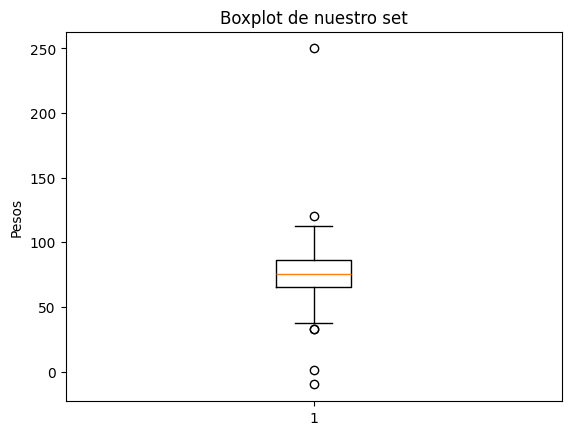

In [ ]:
import matplotlib.pyplot as plt

plt.boxplot(datos)

plt.title('Boxplot de nuestro set')
plt.ylabel('Pesos')

plt.show()

**Ejercicio 6: Estandarizar los datos de las tres formas que se han visto.**

Los tres métodos que existen para la estandarización de los datos son:

* Estandarización por rangos
* Estandarización Z-score
* Escalamiento Decimal

### Caso 1: Estandarización por rangos

Antes de hacer cualquier estandarización es imprescindible hacer una selección de las columnas numéricas:

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import make_column_selector

# Listamos las columnas con los decimales generados por numpy (float64) y los enteros (int)
numeric_cols = data.select_dtypes(include=['float64', 'int']).columns.to_list()

La estandarización por rangos se caracteriza por transformar todos los valores en un rango determinado por un mínimo y un máximo. Normalmente se suele usar 0 y 1.

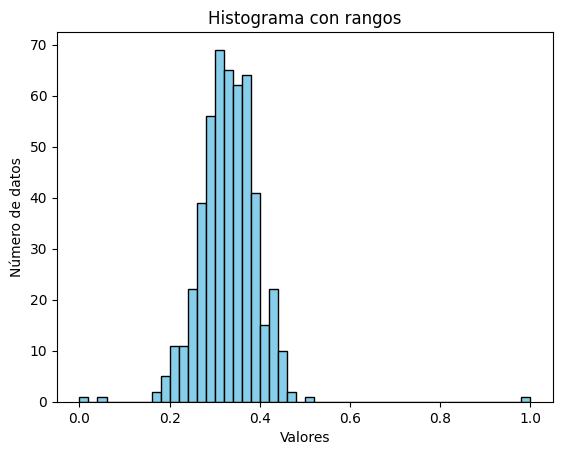

In [ ]:
preprocessor_MM = ColumnTransformer( # Transformamos las columnas anteriores
                   [('scale', MinMaxScaler(), numeric_cols)], remainder='passthrough')

data_prep_MM = preprocessor_MM.fit_transform(data) # Encajamos los datos

plt.hist(data_prep_MM, bins=50, color='skyblue', edgecolor='black')
plt.ylabel('Número de datos')
plt.xlabel('Valores')
plt.title('Histograma con rangos')
plt.show()

### Caso 2: Estandarización Z-score

En este caso se busca que las variables tengan media 0 y desviación estándar 1.

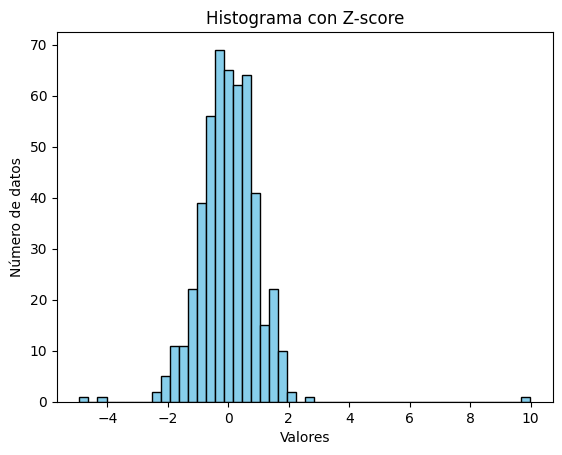

In [ ]:
preprocessor_SS = ColumnTransformer(
                   [('scale', StandardScaler(), numeric_cols)],remainder='passthrough')

data_prep_SS = preprocessor_SS.fit_transform(data)

plt.hist(data_prep_SS, bins=50, color='skyblue', edgecolor='black')
plt.ylabel('Número de datos')
plt.xlabel('Valores')
plt.title('Histograma con Z-score')
plt.show()

### Caso 3: Escalamiento Decimal

Este método coge los valores y los divide por potencias de 10, lo que hace que todos queden en la misma magnitud. El problema con este método es que no hay una librería que lo implemente, por lo tanto hay que hacerlo de manera casera. Para ello crearemos la siguiente función:

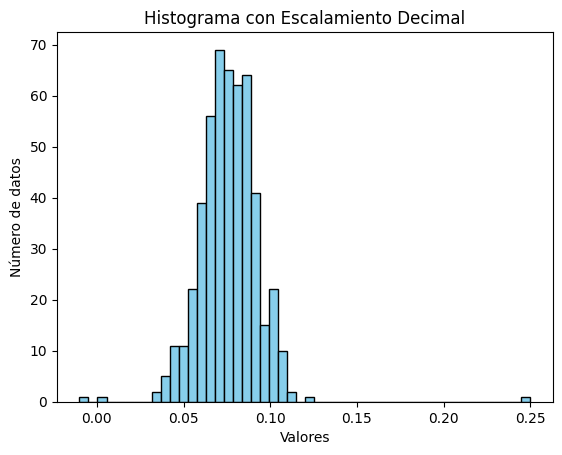

In [ ]:
# Función de escalamiento decimal
def decimal_scaling(df, columns):
    for col in columns:
        # Calcula el valor absoluto máximo de la columna
        max_abs_val = df[col].abs().max()
        # Calcula la potencia de 10 necesaria
        j = len(str(int(max_abs_val)))  # Convertir a entero y contar dígitos
        # Escala la columna dividiendo por 10^j
        df[col] = df[col] / (10 ** j)
    return df

# 1. Aplicamos el escalamiento decimal
# 2. Convertimos a DataFrame
# 3. Dibujamos histograma
data_scaled = decimal_scaling(data.copy(), numeric_cols)

data_prep_DS = data_scaled.values

plt.hist(data_prep_DS, bins=50, color='skyblue', edgecolor='black')
plt.ylabel('Número de datos')
plt.xlabel('Valores')
plt.title('Histograma con Escalamiento Decimal')
plt.show()